## Libraries

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import NullLocator
import cv2
from Contents.masks import generate_mask

## Read images

In [2]:
komodo = dict()
castle = dict()
komodo['original'] = cv2.imread('Images/komodo.jpg')
castle['original'] = cv2.imread('Images/castle.jpg')

## Plotting images

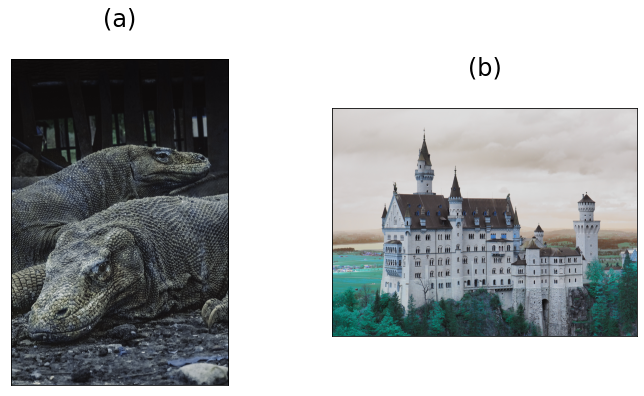

In [3]:
fig, axs = plt.subplots(1,2, figsize = (12,6))

axs[0].imshow(komodo['original'])
axs[1].imshow(castle['original'])

titles = ['(a)\n', '(b)\n']

for ax, title in zip(axs,titles):
        
        # Set title
        
        ax.set_title(title, fontsize = 24)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())

## Save images with differents compressions

In [4]:
cv2.imwrite('Results/komodo1.jpg', 
            komodo['original'], 
            [int(cv2.IMWRITE_JPEG_QUALITY), 80])
komodo['compression1'] = cv2.imread('Results/komodo1.jpg')
cv2.imwrite('Results/komodo2.jpg', 
            komodo['compression1'], 
            [int(cv2.IMWRITE_JPEG_QUALITY), 70])
komodo['compression2'] = cv2.imread('Results/komodo2.jpg')
cv2.imwrite('Results/komodo3.jpg', 
            komodo['compression2'], 
            [int(cv2.IMWRITE_JPEG_QUALITY), 50])
komodo['compression3'] = cv2.imread('Results/komodo3.jpg')

In [5]:
cv2.imwrite('Results/castle1.jpg', 
            castle['original'], 
            [int(cv2.IMWRITE_JPEG_QUALITY), 80])
castle['compression1'] = cv2.imread('Results/castle1.jpg')
cv2.imwrite('Results/castle2.jpg', 
            castle['compression1'], 
            [int(cv2.IMWRITE_JPEG_QUALITY), 70])
castle['compression2'] = cv2.imread('Results/castle2.jpg')
cv2.imwrite('Results/castle3.jpg', 
            castle['compression2'], 
            [int(cv2.IMWRITE_JPEG_QUALITY), 50])
castle['compression3'] = cv2.imread('Results/castle3.jpg')

## Generate masks

In [6]:
komodo['mask'] = generate_mask(
    image = komodo['original'], 
    kind = 'standing')

In [7]:
castle['mask'] = generate_mask(
    image = castle['original'], 
    kind = 'standing')

## Create compositions

In [8]:
original_mask = (1 - komodo['mask'])*komodo['original']

for i in range(1,4):
    temp = komodo['mask']*komodo['compression' + str(i)]
    komodo['composition' + str(i)] = (original_mask + temp).astype(np.int32)
    cv2.imwrite(
        'Results/komodo_composition' + str(i) +'.jpg', 
        komodo['composition' + str(i)], 
            [int(cv2.IMWRITE_JPEG_QUALITY), 90])

In [9]:
original_mask = (1 - castle['mask'])*castle['original']

for i in range(1,4):
    temp = castle['mask']*castle['compression' + str(i)]
    castle['composition' + str(i)] = (original_mask + temp).astype(np.int32)
    cv2.imwrite(
        'Results/castle_composition' + str(i) +'.jpg', 
        castle['composition' + str(i)], 
            [int(cv2.IMWRITE_JPEG_QUALITY), 90])